# Analyse de commentaires YouTube

Projet Python de deuxième année à l'ENSAE Paris.

Antoine Lelong, Louisa Camadini, Yseult Masson

# Introduction

Les commentaires postés sous les vidéos YouTube sont une source d'information, complémentaire avec les "likes", pour les créateurs de contenu. Ils permettent au vidéaste de déterminer si son travail a plu ou non à son audience. Cependant, les Youtubeurs n'ont pas nécessairement le temps de tous les lire. Il nous a donc semblé intéressant d'analyser ces commentaires informatiquement, plutôt que de les traiter un à un.

Pour ce projet, nous nous sommes penchés sur la chaîne YouTube DirtyBiology, qui fait de la vulgarisation scientifique. Notre choix a été motivé par le fait que les commentaires sous de telles vidéos étaient à la fois nombreux (car la chaîne est relativement connue), constructifs (de par le contenu scientifique) et sans trop de fautes d'ortographes. Cela nous permettait d'avoir des données exploitables pour l'analyse que nous voulions en faire.

In [4]:
!pip install -r requirements.txt

In [5]:
# Import des modules utiles

from googleapiclient.discovery import build
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
import nltk
nltk.download('punkt')

ModuleNotFoundError: No module named 'textblob'

# 1 - Webscraping, création et nettoyage de la base de données (Antoine)

Dans un premier temps, nous avons utilisé [l'API YouTube Data](https://developers.google.com/youtube/v3), qui nous permet de récupérer les 100 commentaires les plus "pertinents" d'une vidéo, sur jusqu'à 20 vidéos différentes, constituant ainsi une base de données de 2000 commentaires, ainsi que quelques données supplémentaires, comme le nombre de likes, le nom d'utilisateur...

In [1]:
!python scraper.py

Traceback (most recent call last):
  File "scraper.py", line 1, in <module>
    from googleapiclient.discovery import build
ModuleNotFoundError: No module named 'googleapiclient'


## 1.1 - Webscraping

## 1.2 - Nettoyage de la base de données

# 2 - Analyse des commentaires

Import de la base créée grâce au code de la partie 1: (mettre le chemin autrement)

In [2]:
cd C:\Users\yseul\Documents\ENSAE\2A\Info\projet-python-2a\

C:\Users\yseul\Documents\ENSAE\2A\Info\projet-python-2a


In [3]:
data = pd.read_csv("comments.csv")

## 2.1 - Thèmes majoritairement abordés dans les commentaires (Louisa)

In [ ]:
# Installations nécessaires 

#!pip install nltk
#!pip install pywaffle
#conda install -c conda-forge wordcloud

In [16]:
# Import des modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
import nltk

from collections import Counter
from time import time
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
#!pip install pywaffle
from pywaffle import Waffle

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to /home/jovyan/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [21]:
df = data # (pd.read_csv("comments.csv"))
df['textOriginal'] = df['textOriginal'].str.replace("\n" , "  ")
df['textOriginal'] = df['textOriginal'].str.replace("\'", " ")
#df.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,publishedAt,updatedAt,commentLikeCount,viewCount,commentCount,videoLikeCount,videoTitle,videoDate,textClean
0,8Y-ObRQk5TA,Qui d&#39;autre veut la vidéo de 10h en mode t...,Qui d autre veut la vidéo de 10h en mode top 5...,Victorin Demange,https://yt3.ggpht.com/ytc/AKedOLRM36O43sCehBU5...,http://www.youtube.com/channel/UCqj3nApyBpfWW0...,UCqj3nApyBpfWW0zuVTxfRXw,True,none,2021-12-12T13:16:45Z,2021-12-13T14:19:23Z,1060,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,qui d'autre veut la vidéo de 10h en mode top 5...
1,8Y-ObRQk5TA,Un ASMR de 10h sur des exemples d&#39;évolutio...,Un ASMR de 10h sur des exemples d évolutions c...,Terry Anouilh,https://yt3.ggpht.com/ytc/AKedOLTWe1mt7NByzkUT...,http://www.youtube.com/channel/UCn5G6QaD5w_TCO...,UCn5G6QaD5w_TCODclVbKENQ,True,none,2021-12-12T14:21:48Z,2021-12-12T14:21:48Z,409,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,un asmr de 10h sur des exemples d'évolutions c...
2,8Y-ObRQk5TA,toujours un plaisir ces vidéos,toujours un plaisir ces vidéos,Dark,https://yt3.ggpht.com/Cv3SNTMi0KHR4x3goJUK7VlR...,http://www.youtube.com/channel/UC6hZ64RB21tnY-...,UC6hZ64RB21tnY-M7jfguuzg,True,none,2021-12-13T07:11:21Z,2021-12-13T07:11:21Z,110,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,toujours un plaisir ces vidéos
3,8Y-ObRQk5TA,Nickel j&#39;avais exactement 15 min à perdre ...,Nickel j avais exactement 15 min à perdre à 14...,Salade Furtive,https://yt3.ggpht.com/ytc/AKedOLSEBH5bF4sYCTD0...,http://www.youtube.com/channel/UCsBjmNhPIpw9y4...,UCsBjmNhPIpw9y4menljVAXw,True,none,2021-12-12T13:03:48Z,2021-12-12T13:03:48Z,464,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,nickel j'avais exactement 15 min à perdre à 14...
4,8Y-ObRQk5TA,Je suis en première année de licence de bio et...,Je suis en première année de licence de bio et...,Amélie 18290,https://yt3.ggpht.com/ytc/AKedOLTVVya6P2ld2fj2...,http://www.youtube.com/channel/UCUeYZGxv_AgSYJ...,UCUeYZGxv_AgSYJltQiThiXA,True,none,2021-12-12T23:06:39Z,2021-12-12T23:06:39Z,83,378580,767,35255,Pourquoi l&#39;évolution se répète en boucle -...,2021-12-12T13:00:37Z,je suis en première année de licence de bio et...


### Tokenisation

On voit que l'on va s'intéresser ici à la colonne 'textOriginal'. Chaque ligne du dataframe représente un commentaire. L'ensemble de ces lignes, c'est-à-dire tous les commentaires, correspondent donc à notre texte d'étude. Il s'agit tout d'abord de décomposer le texte en unités lexicales.

In [22]:
dumas = " ".join(df['textOriginal'])
type(dumas)

str

Il faut d'abord nettoyer le texte, ce qui signifie le diviser en mots, gérer la ponctuation et la casse.

In [31]:
import re

def clean_text(text):
    text = text.lower() # mettre les mots en minuscule
    text = " ".join(text.split())
    return text

dumas = clean_text(dumas)

In [32]:
words = nltk.word_tokenize(dumas, language='french')
#words[1030:1050]
len(words)

57831

La texte a bien été décomposé en 'tokens', mais ce ne sont pas tous des mots : certains peuvent être des signes de ponctuation, des smileys... 
La méthode isalpha() renvoie "True" si tous les caractères de la chaîne sont des alphabets, sinon, elle renvoie "False".  Cette fonction est utilisée pour vérifier si l'argument ne comprend que des caractères alphabétiques (mentionnés ci-dessous). 


In [33]:
words = [word for word in words if word.isalpha()]
#words[1030:1050]
len(words)

48813

De plus, certains mots comme les déterminants, pronoms, sont répétitifs et inutiles à l'analyse du texte. On supprime donc ce qu'on appelle les 'stopwords' :

In [ ]:
from nltk.corpus import stopwords
#print(stopwords.words("french"))

In [ ]:
stop_words = set(stopwords.words('french'))

words = [w for w in words if not w in stop_words]
print(words[1030:1050])

## 2.2 - Polarisation des commentaires (Yseult)

### 2.2.1 - Calcul de polarités

Le module TextBlob est un module python de NLP utilisé pour l'analyse de sentiments et qui permet, entre autres, de calculer la polarité d'un texte. Celle-ci est définie par un nombre entre -1 et 1, et détermine le degré de satisfaction ou d'insatisfaction qui se dégage du texte. Plus la polaritée est proche de 1, plus le texte dégage un sentiment positif, et vice-versa.

Nous avons calculé la polarité de chaque commentaire de deux façons. Nous avons d'une part appliqué directement la fonction du module TextBlob qui nous intéresse au commentaire. D'autre part, nous avons découpé chaque commentaire en phrases, avant d'appliquer à chacune de celles-ci la fonction qui renvoie leur polarisation, puis d'en faire la moyenne sur toutes les phrases du commentaire.

In [4]:
def blober(text: str) -> float:
    '''
    Calcule la polarité d'un texte.
    
    Paramètres : 
    ----------
    text : str
        texte dont on veut mesurer la polarité
        
    Sortie :
    ----------
    float
        polarisation : score entre -1 et 1.
        Plus le score est proche de 1, plus le commentaire est positif.
        Plus il est proche de -1, plus le commentaire est négatif.
    '''
    return TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]

blober = np.vectorize(blober)

def sentences(comment: str) -> list:
    '''
    Découpe un texte en phrases.
    
    Paramètres : 
    ----------
    comment : str
        texte dont on veut extraire les phrases
        
    Sortie :
    ----------
    list[str]
        liste des phrases du texte
    '''
    tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
    return tokenizer.tokenize(comment)

def polarisation(comment: str) -> float:
    '''
    Calcule la polarisation d'un commentaire en calculant d'abord la polarisation de chacune de ses 
    phrases et en en faisant la moyenne
    
    Paramètres : 
    ----------
    comment : str
        texte dont on veut la polarisation
        
    Sortie :
    ----------
    float
        moyenne des polarisations des phrases du texte
    '''
    s = sentences(comment)
    return np.mean(blober(s))

polarisation = np.vectorize(polarisation)

Nous avons ensuite ajouté 2 nouvelles colonnes à la base de données:

   - Polarity : polarité de chaque commentaire, calculée sur le commentaire entier directement
    
   - sentencesPolarity : polarité de chaque commentaire, calculée en prenant la moyenne des polarités sur chaque phrase que comporte le commentaire.

In [5]:
data["Polarity"] = data.loc[:,['textClean']].apply(blober)
data["sentencesPolarity"] = data.loc[:,['textClean']].apply(polarisation)

Création d'une colonne de numéros des vidéos (ici ou partie 1)

In [6]:
data['DBY'] = data.loc[:,['videoTitle']].apply(np.vectorize(lambda string : string[-7:]))

### 2.2.2 Analyse des polarités

Dans un premier temps, on s'intéresse à la répartition des polarités pour une vidéo, ici la vidéo "Comment ces champis nous ont façonnés - DBY #76".

In [27]:
data.loc[data['DBY'] == "DBY #76", ['Polarity', 'sentencesPolarity']].describe()

,Polarity,sentencesPolarity
count,100.000000,100.000000
mean,0.358376,0.308844
std,0.291595,0.259852
min,-0.200000,-0.106000
25%,0.145833,0.121979
50%,0.343125,0.252500
75%,0.499766,0.450833
max,1.000000,1.000000


On voit que pour les deux types de polarité, il y a très peu de valeurs négatives. Cela implique que les commentaires de cette vidéo sont pour la plupart perçus comme positifs.
Les écarts type sont de 0.29 et 0.26, ce qui est assez élevé pour des valeurs de polarités allant entre -0.2 (-0.1 pour "sentencesPolarity") et 1. Ainsi, les commentaires de cette vidéo dégagent plusieurs degrés de satisfaction, allant de neutre à très satisfait. La moitié d'entre eux sont relativement satisfaits, et ont une polarité se trouvant entre 0.15 et 0.50 (0.12 et 0.45 pour sentencesPolarity).

Cela se perçoit bien sur les histogrammes ci-dessous:

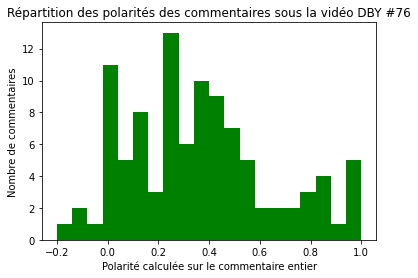

In [47]:
plt.hist(data.loc[data['DBY'] == "DBY #76", 'Polarity'], bins = 20, color = 'green')
plt.xlabel("Polarité calculée sur le commentaire entier")
plt.ylabel("Nombre de commentaires")
plt.title("Répartition des polarités des commentaires sous la vidéo DBY #76")
plt.show()

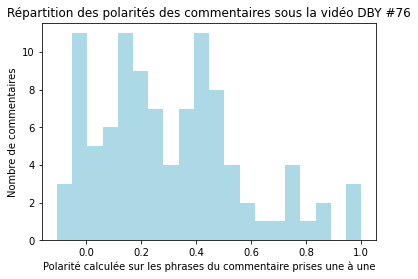

In [48]:
plt.hist(data.loc[data['DBY'] == "DBY #76", 'sentencesPolarity'], bins = 20, color = 'lightblue')
plt.xlabel("Polarité calculée sur les phrases du commentaire prises une à une")
plt.ylabel("Nombre de commentaires")
plt.title("Répartition des polarités des commentaires sous la vidéo DBY #76")
plt.show()

Nous avons ensuite fait la moyenne des polarités sur les 100 commentaires de chaque vidéo, ce qui nous permet de comparer les vidéos entre elles.

In [7]:
datapol = data.groupby(['DBY']).mean().sort_values('Polarity', ascending = False)
datapol.loc[:, ['videoLikeCount', 'Polarity', 'sentencesPolarity']]

,videoLikeCount,Polarity,sentencesPolarity
DBY,,,
DBY #72,87989.0,0.391309,0.378558
DBY #81,40049.0,0.389876,0.322359
DBY #74,50143.0,0.374054,0.324198
DBY #80,42476.0,0.363191,0.331241
DBY #76,47150.0,0.358376,0.308844
DBY#84,49593.0,0.353083,0.297797
DBY #77,62565.0,0.339487,0.299937
DBY #87,34479.0,0.338270,0.295363
DBY #82,46056.0,0.334684,0.296303


Tout d'abord, nous avons cherché à savoir si les résultats de polarisation restaient cohérents entre les deux méthodes utilisées.

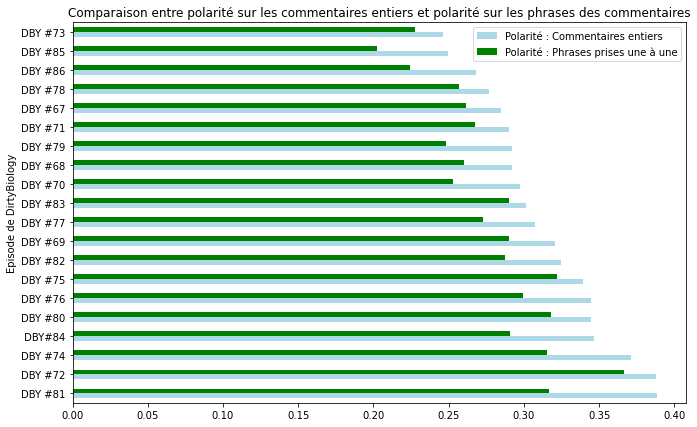

In [14]:
datapol.loc[:,['Polarity','sentencesPolarity']].plot(kind = 'barh', figsize = (11, 7), color = ['lightblue', 'green'], title = 'Comparaison entre polarité sur les commentaires entiers et polarité sur les phrases des commentaires', xlabel = 'Episode de DirtyBiology')
plt.legend(labels = ['Polarité : Commentaires entiers', 'Polarité : Phrases prises une à une'])
plt.show()

L'ordre des vidéos change un peu selon la définition que l'on utilise pour la polarité, mais les deux définitions semblent tout de même corrélées (globalement, la polarité prise sur chaque phrase augmente avec celle prise sur le commentaire entier).

Dans la suite, on garde la polarité sur le commentaire entier.

La polarité est un témoin du succès qu'a eu une vidéo. On cherche à présent à la comparer à un autre marqueur de ce succès, à savoir le ratio de "likes" qu'à reçu une vidéo par rapport à son nombre de vues.

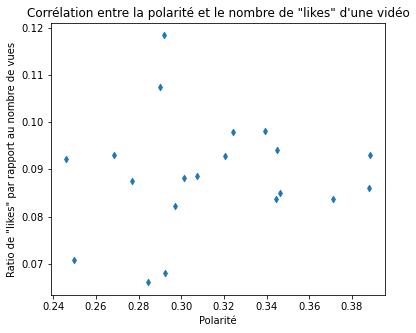

In [9]:
datapol['likeRatio'] = datapol.loc[:,'videoLikeCount'].divide(datapol.loc[:,'viewCount'])
datapol.plot(kind = 'scatter', x = 'Polarity', y = 'likeRatio',figsize = (6, 5), marker = 'd', xlabel = 'Polarité', ylabel = 'Ratio de \"likes\" par rapport au nombre de vues', title = 'Corrélation entre la polarité et le nombre de \"likes\" d\'une vidéo')
plt.show()

Il semble ne pas y avoir de corrélation entre ces deux marqueurs. Cela peut être dû au fait que la polarisation ne soit pas très précise, ou que les personnes qui commentent les vidéos n'aient pas le même profil que ceux qui se contentent de "liker".

## 2.3 - Sentence Transformer (Antoine)